In [315]:
#!/usr/bin/env python
# Written by Jason Huang
# This report aims to answer questions on GPU that is usually installed on computers.

# Cleaning data results in the following modification to dataset.
# GCN 1.1 Grenada XT (line 954)

# Create as many graphs as you can (scatter plots, bar graphs, pie chart, boxplot, line plot, histogram, etc.)
# Filter your data to different categories (as memory type, manufacturer, etc.) and graph them.
# Observe the correlations between data by using scatter plot
# How to apply t-test to answer the hypothesis
# After finish drawing graphs you can fill out the analysis (you should analyze every graph)

#print('In the GPU market, on average, who produced the best processing power per energy spent?')

# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Create functions here to use.
def replace(column):
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].str.replace('\n-', '0')
    df[column] = df[column].str.replace('\n', '0')
    df[column] = df[column].str.replace('GB/sec', '')
    df[column] = df[column].str.replace('1000MB/sec', '1')
    df[column] = df[column].str.replace('880MB/sec', '0.88')
    df[column] = df[column].str.replace('800MB/sec', '0.8')
    df[column] = df[column].str.replace('MB', '')
    df[column] = df[column].str.replace('Bit', '')
    df[column] = df[column].str.replace('MHz', '')
    df[column] = df[column].fillna(0)
    df[column] = df[column].apply(pd.to_numeric)
    
def date_replace(column):
    df[column] = df[column].str.replace('\n', '')
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.replace('\nUnknown Release Date', '')
    df[column] = df[column].str.replace('UnknownReleaseDate', '0')
    df[column] = df[column].str.replace('Jan', '01')
    df[column] = df[column].str.replace('Feb', '02')
    df[column] = df[column].str.replace('Mar', '03')
    df[column] = df[column].str.replace('Apr', '04')
    df[column] = df[column].str.replace('May', '05')
    df[column] = df[column].str.replace('Jun', '06')
    df[column] = df[column].str.replace('Jul', '07')
    df[column] = df[column].str.replace('Aug', '08')
    df[column] = df[column].str.replace('Sep', '09')
    df[column] = df[column].str.replace('Oct', '10')
    df[column] = df[column].str.replace('Nov', '11')
    df[column] = df[column].str.replace('Dec', '12')
    
def population(pop1, pop2):
    plt.hist(pop1, alpha=0.5, label='Population 1')
    plt.hist(pop2, alpha=0.5, label='Population 2')
    plt.legend(loc='upper right')
    plt.show()
    
def sampling(sample1, sample2):
    plt.hist(sample1, alpha=0.5, label='sample 1')
    plt.hist(sample2, alpha=0.5, label='sample 2')
    plt.legend(loc='upper right')
    plt.show()
    
def t_test(sample1, sample2):
    # Calculate the T-test
    # Compute the difference between the two sample means.
    diff = sample2.mean() - sample1.mean()
    print('The difference between two sample mean is {}.'.format(diff))
    # Create the arrays to calculate the standard error of difference.
    size = np.array([len(sample1), len(sample2)])
    sd = np.array([sample1.std(), sample2.std()])
    print('The arrary for size is {}.'.format(size))
    print('The array for standard deviation is {}.'.format(sd))
    # Standard Error equation is squared standard deviations 
    # divided by sample size, summed, then square rooted.
    diff_se = (sum((sd ** 2) / size)) ** 0.5
    print('The standard error of this dataset is {}.'.format(diff_se))
    # T-Value is difference between means divided by Standard Error
    print('The T-value of this dataset is {}.'.format(diff / diff_se))
    
# Create a dataframe and import the dataset.
df = pd.read_csv('All_GPUs.csv')

# Remove name tags and replace NaN with 0.
replace('Release_Price')
replace('Memory')
replace('Memory_Bandwidth')
replace('Memory_Bus')
replace('Core_Speed')
date_replace('Release_Date')

#Testing room
#print(df['Release_Price'][170:190])
#print(df['Memory'])
#print(df['Core_Speed'])
#print(df['Release_Date'][100:150])
#df

0        1024
1         512
2         512
3         256
4         256
5         256
6        2048
7         256
8        2048
9          64
10        128
11       6144
12       5120
13      12288
14         64
15       3072
16       8192
17       6144
18          0
19        256
20       6144
21       6144
22        128
23        128
24          0
25        128
26       3072
27          0
28          0
29          0
        ...  
3376      128
3377      128
3378      128
3379      128
3380      128
3381     2048
3382      128
3383       64
3384      128
3385      128
3386      128
3387      256
3388      128
3389      256
3390      256
3391      256
3392      256
3393      128
3394      256
3395      256
3396       32
3397      256
3398      128
3399        0
3400        0
3401        0
3402        0
3403        0
3404        0
3405      256
Name: Memory, Length: 3406, dtype: int64


Question 1: How do the GPU processing power affect the price?
We will first compare Memory to Release Price.


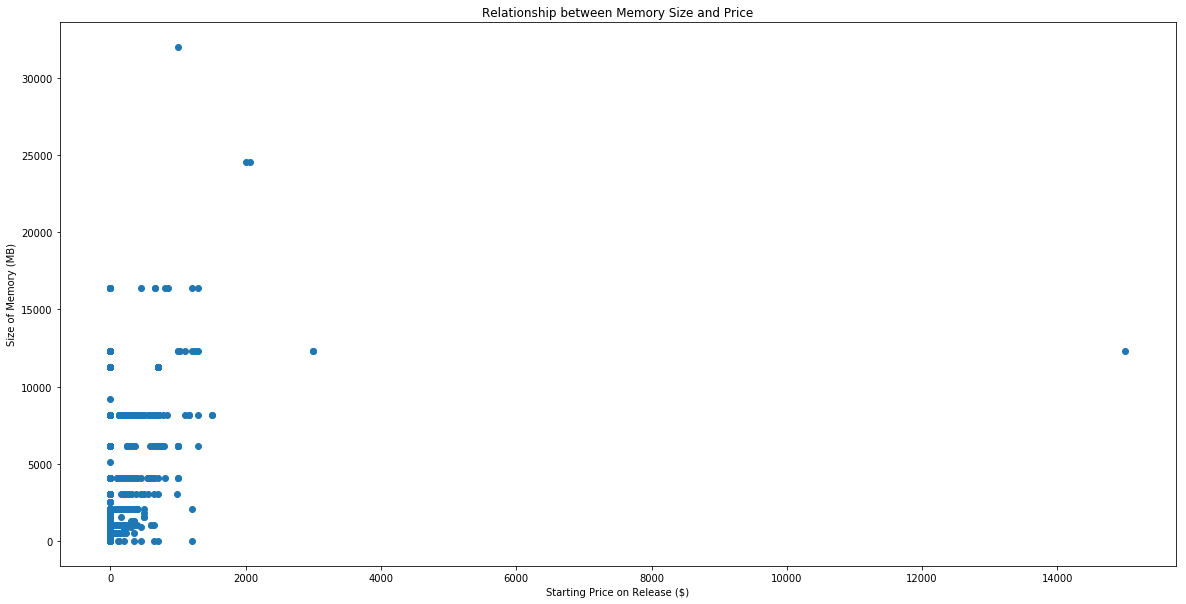

In [311]:
print('Question 1: How do the GPU processing power affect the price?')
print('We will first compare Memory to Release Price.')
# Convert price column to integers only.
# Plot only processing power and price.
plt.figure(figsize=(20, 10))
plt.scatter(x=df['Release_Price'], y=df['Memory'])
plt.ylabel('Size of Memory (MB)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Size and Price')
plt.show()

However, the scatterplot is hard to see clearly due to the one outlier that is sitting outside.
Also, is there really a GPU out there that cost $14999.00 while some are $1499.00?
This must be a typo in the dataset.
The modified plot shows that as GPU memory size increase, less GPU are made and prices generally jump higher.


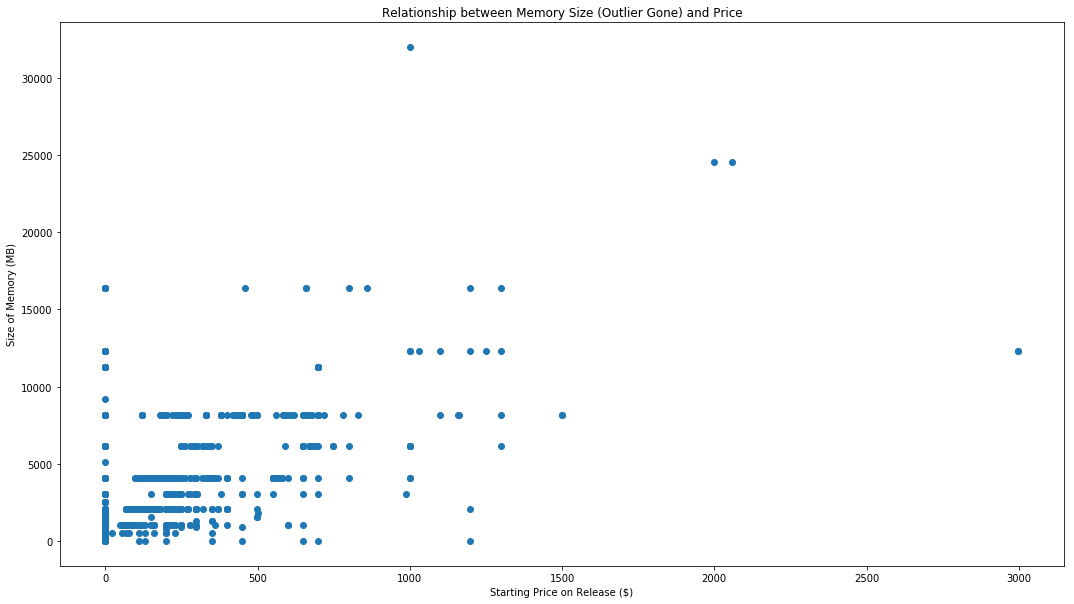

In [282]:
print('However, the scatterplot is hard to see clearly due to the one outlier that is sitting outside.')
print('Also, is there really a GPU out there that cost $14999.00 while some are $1499.00?')
print('This must be a typo in the dataset.')
print('The modified plot shows that as GPU memory size increase, less GPU are made and prices generally jump higher.')
# Identified the outlier
#outlier = df.loc[df['Release_Price'].idxmax()]
#print(outlier)

# Modified dataframe
outlier_dropped = df.drop(df.index[1640])

# Plot new dataframe
plt.figure(figsize=(18, 10))
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Memory'])
plt.ylabel('Size of Memory (MB)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Size (Outlier Gone) and Price')
plt.show()

How will this be applied if it is Memory Bandwidth?


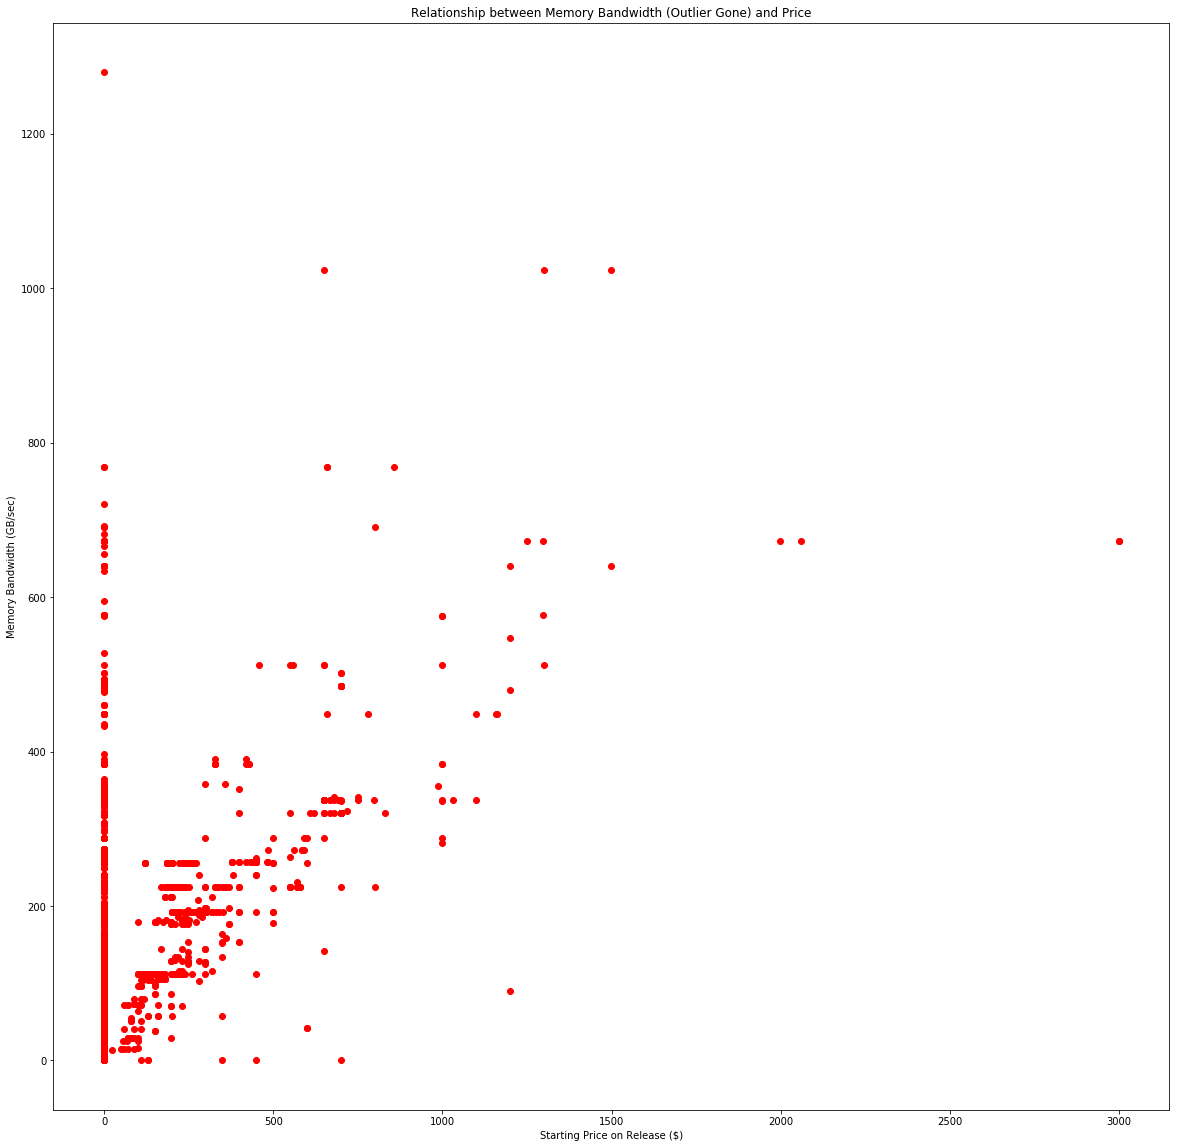

In [283]:
print('How will this be applied if it is Memory Bandwidth?')
# Plot new dataframe
plt.figure(figsize=(20, 20))
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Memory_Bandwidth'], color='red')
plt.ylabel('Memory Bandwidth (GB/sec)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Bandwidth (Outlier Gone) and Price')
plt.show()

How will this be applied if it is Memory Bus?


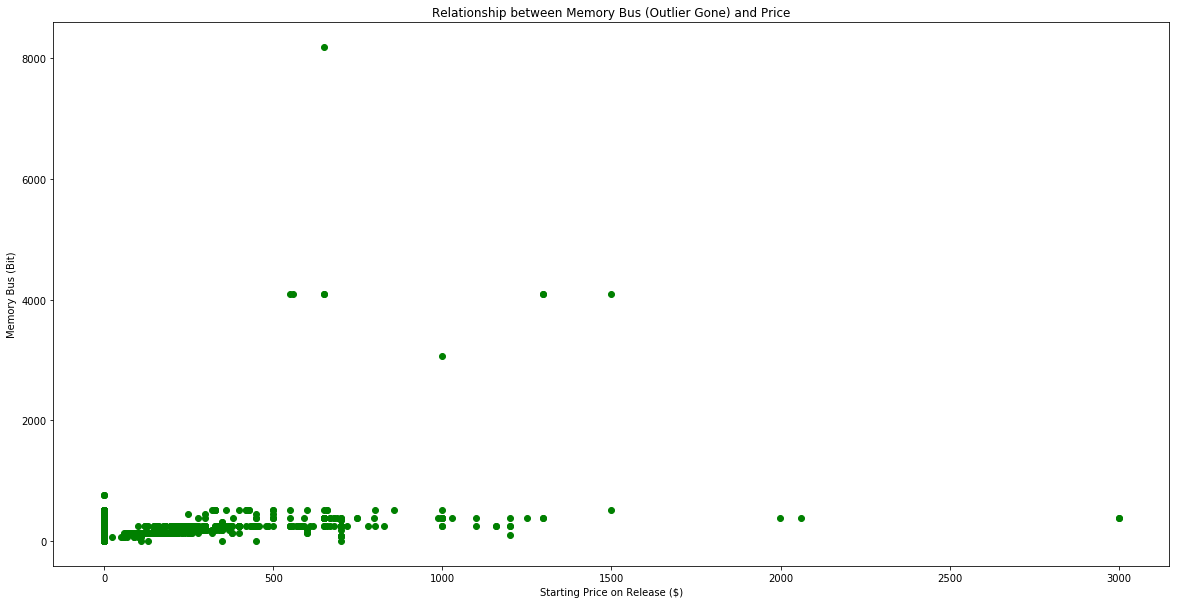

In [284]:
print('How will this be applied if it is Memory Bus?')
# Plot new dataframe
plt.figure(figsize=(20, 10))
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Memory_Bus'], color='green')
plt.ylabel('Memory Bus (Bit)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Bus (Outlier Gone) and Price')
plt.show()

How will this be applied if it is GPU Processor Clock Speed?
Quite unlike all memory resources, the chart varies widely.


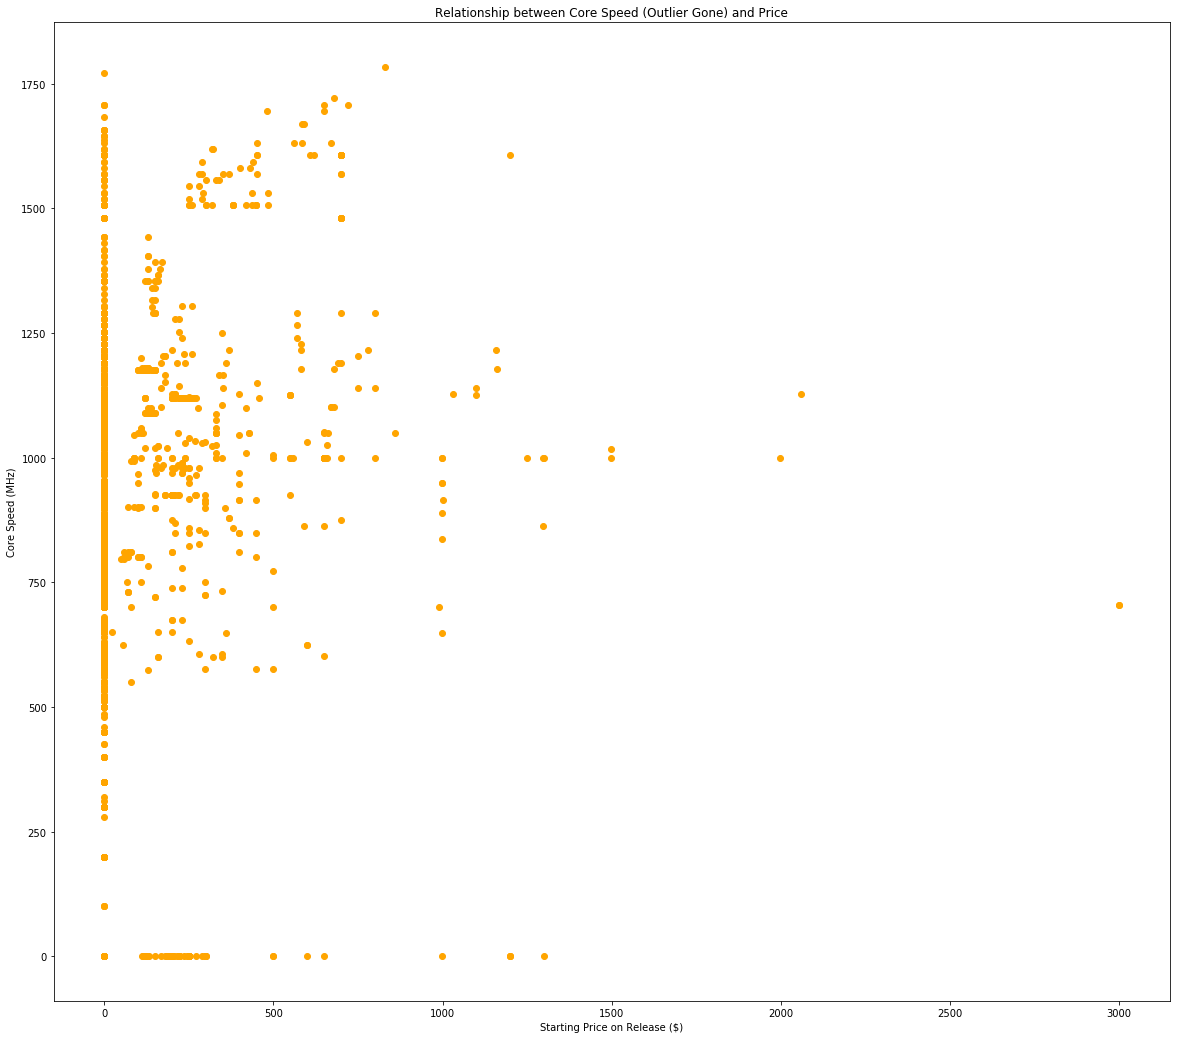

In [285]:
print('How will this be applied if it is GPU Processor Clock Speed?')
print('Quite unlike all memory resources, the chart varies widely.')
plt.figure(figsize=(20, 18))
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Core_Speed'], color='orange')
plt.ylabel('Core Speed (MHz)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Core Speed (Outlier Gone) and Price')
plt.show()

How will this be applied if we combine all memories and price?
In general, higher performance in Memory Resources means higher prices.


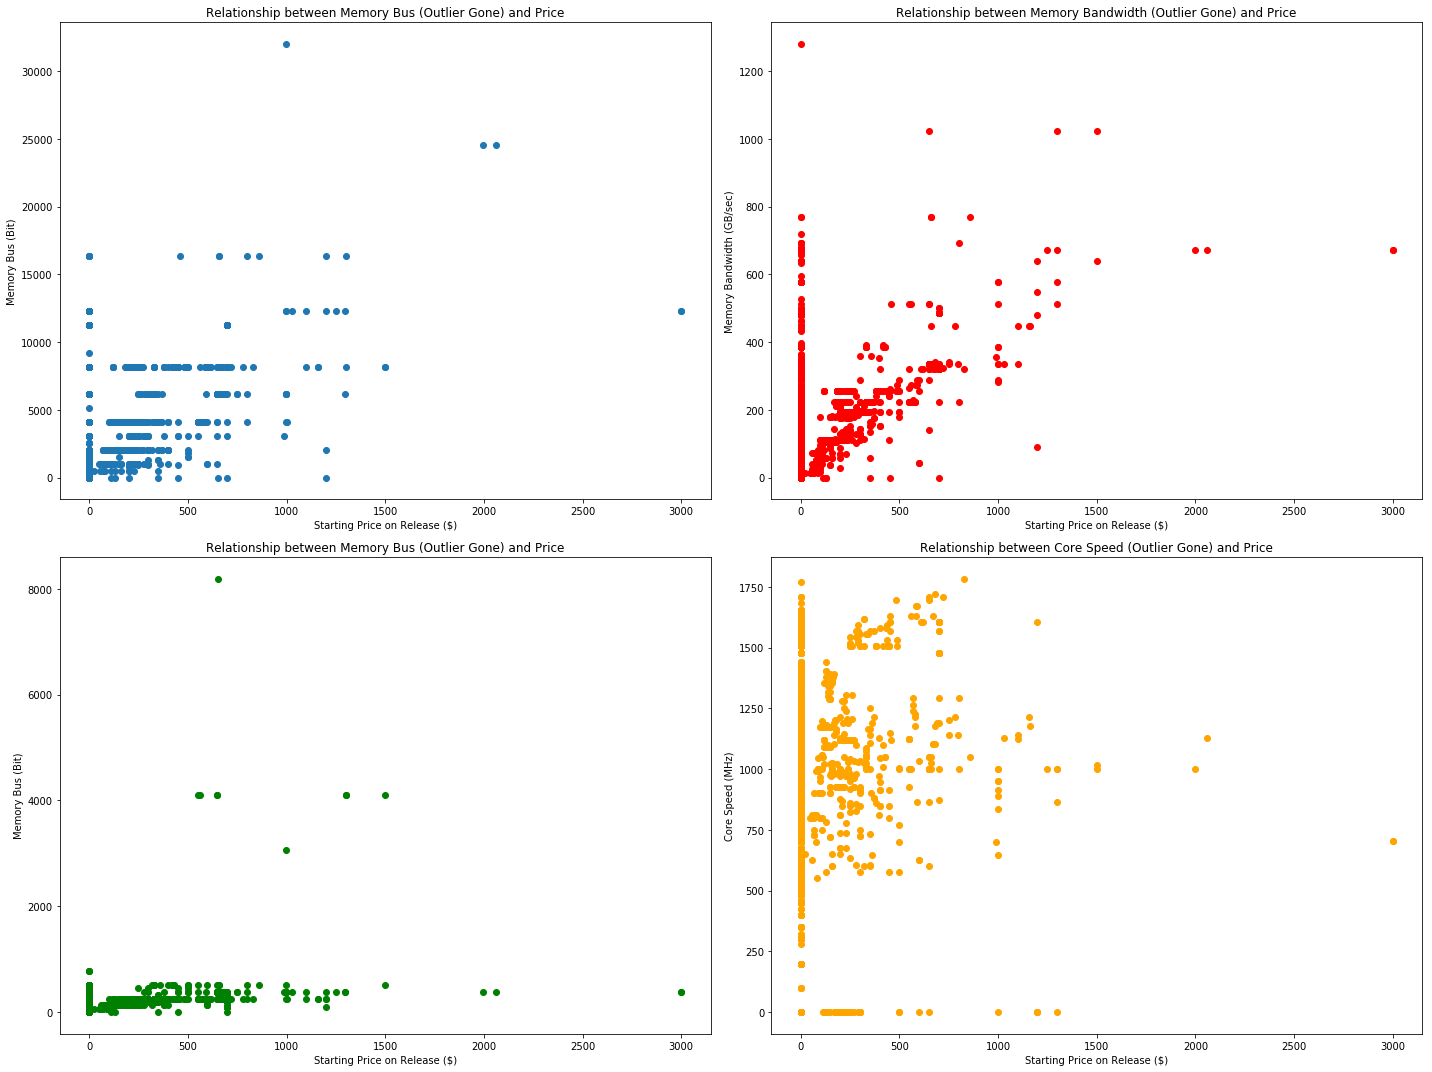

In [286]:
print('How will this be applied if we combine all memories and price?')
print('In general, higher performance in Memory Resources means higher prices.')
# Plot new dataframe
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Memory'])
plt.ylabel('Memory Bus (Bit)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Bus (Outlier Gone) and Price')

plt.subplot(2, 2, 2)
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Memory_Bandwidth'], color='red')
plt.ylabel('Memory Bandwidth (GB/sec)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Bandwidth (Outlier Gone) and Price')

plt.subplot(2, 2, 3)
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Memory_Bus'], color='green')
plt.ylabel('Memory Bus (Bit)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Memory Bus (Outlier Gone) and Price')

plt.subplot(2, 2, 4)
plt.scatter(x=outlier_dropped['Release_Price'], y=outlier_dropped['Core_Speed'], color='orange')
plt.ylabel('Core Speed (MHz)')
plt.xlabel('Starting Price on Release ($)')
plt.title('Relationship between Core Speed (Outlier Gone) and Price')

plt.tight_layout()
plt.show()

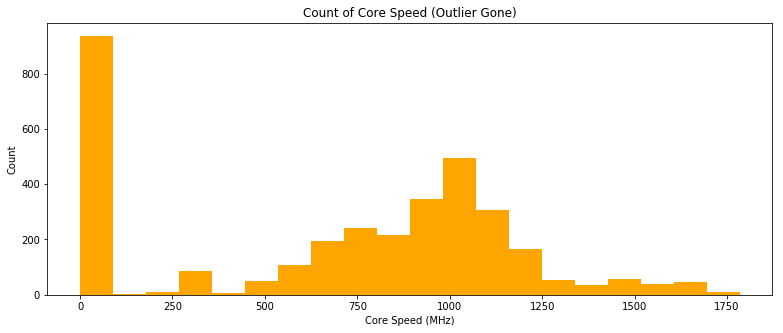

In [287]:
# This data has a lot of empty values replaced with zero.
# Core Speed is Clock Speed, so here we count what's the most MHz at clock speed.
plt.figure(figsize=(13, 5))
plt.hist(outlier_dropped['Core_Speed'], bins=20, color='orange')
plt.ylabel('Count')
plt.xlabel('Core Speed (MHz)')
plt.title('Count of Core Speed (Outlier Gone)')
plt.show()

How has the usage of resources changed over time?


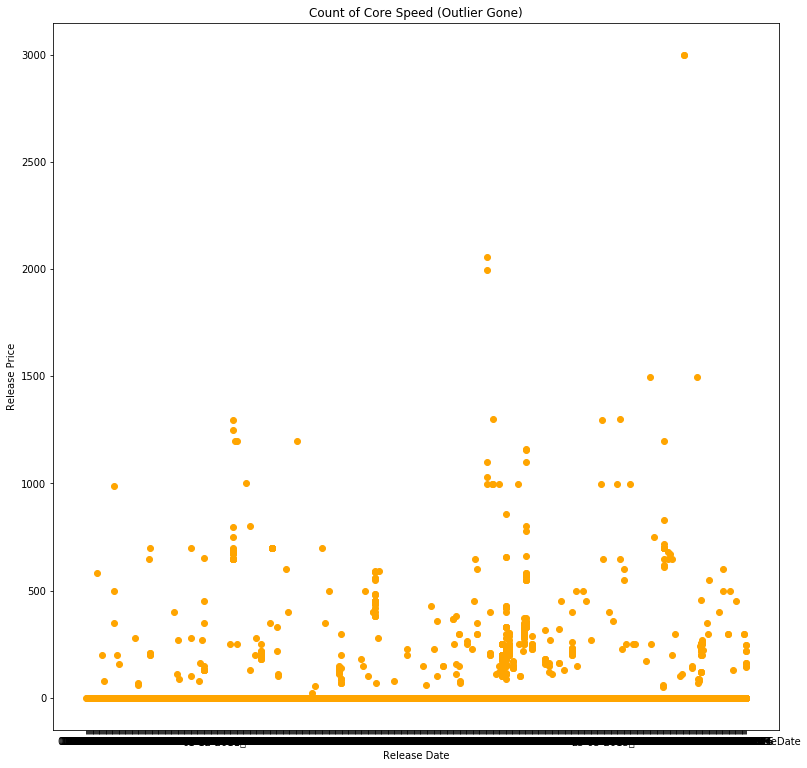

In [292]:
print('How has the usage of resources changed over time?')
# Modified dataframe to compare Maximum Power and Date
plt.figure(figsize=(13, 13))
plt.scatter(x=outlier_dropped['Release_Date'], y=outlier_dropped['Release_Price'], color='orange')
plt.ylabel('Release Price')
plt.xlabel('Release Date')
plt.title('Count of Core Speed (Outlier Gone)')
plt.show()

In [272]:
# Change month and add to dataframe.
date_list = []

for i in df['Release_Date']:
    date_list.append(df['Release_Date'][i][-5:-1])

#print(df.loc[df['Release_Date'].str.contains('Jan')])
#print(df['Release_Date'][1][-5:-1])

KeyError: '\n01-Mar-2009 '